Step 1: Import Necessary **Libraries**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

Step 2: Load the **Dataset**

In [4]:
df = pd.read_csv('Mumbai House Prices.csv')


In [5]:
df

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685.0,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640.0,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610.0,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876.0,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659.0,94.11,L,Mira Road East,Under Construction,New
...,...,...,...,...,...,...,...,...,...
52881,1,Apartment,Solitaire Raj Accord,550.0,24.00,L,Vasai,Under Construction,New
52882,1,Apartment,NK Builders And Developers Chandika Heights,570.0,24.00,L,Naigaon East,Ready to move,New
52883,2,Apartment,Navkar Navkar City,990.0,57.50,L,Naigaon East,Under Construction,New
52884,1,Apartment,Yashvi Pride,535.0,25.00,L,Vasai,Under Construction,New


 Exploratory Data Analysis (EDA)**bold text**

In [8]:
# Display first few rows of the dataset
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685.0,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640.0,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610.0,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876.0,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659.0,94.11,L,Mira Road East,Under Construction,New


## visualise the

array([[<Axes: title={'center': 'bhk'}>,
        <Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'locality'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'price_unit'}>],
       [<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

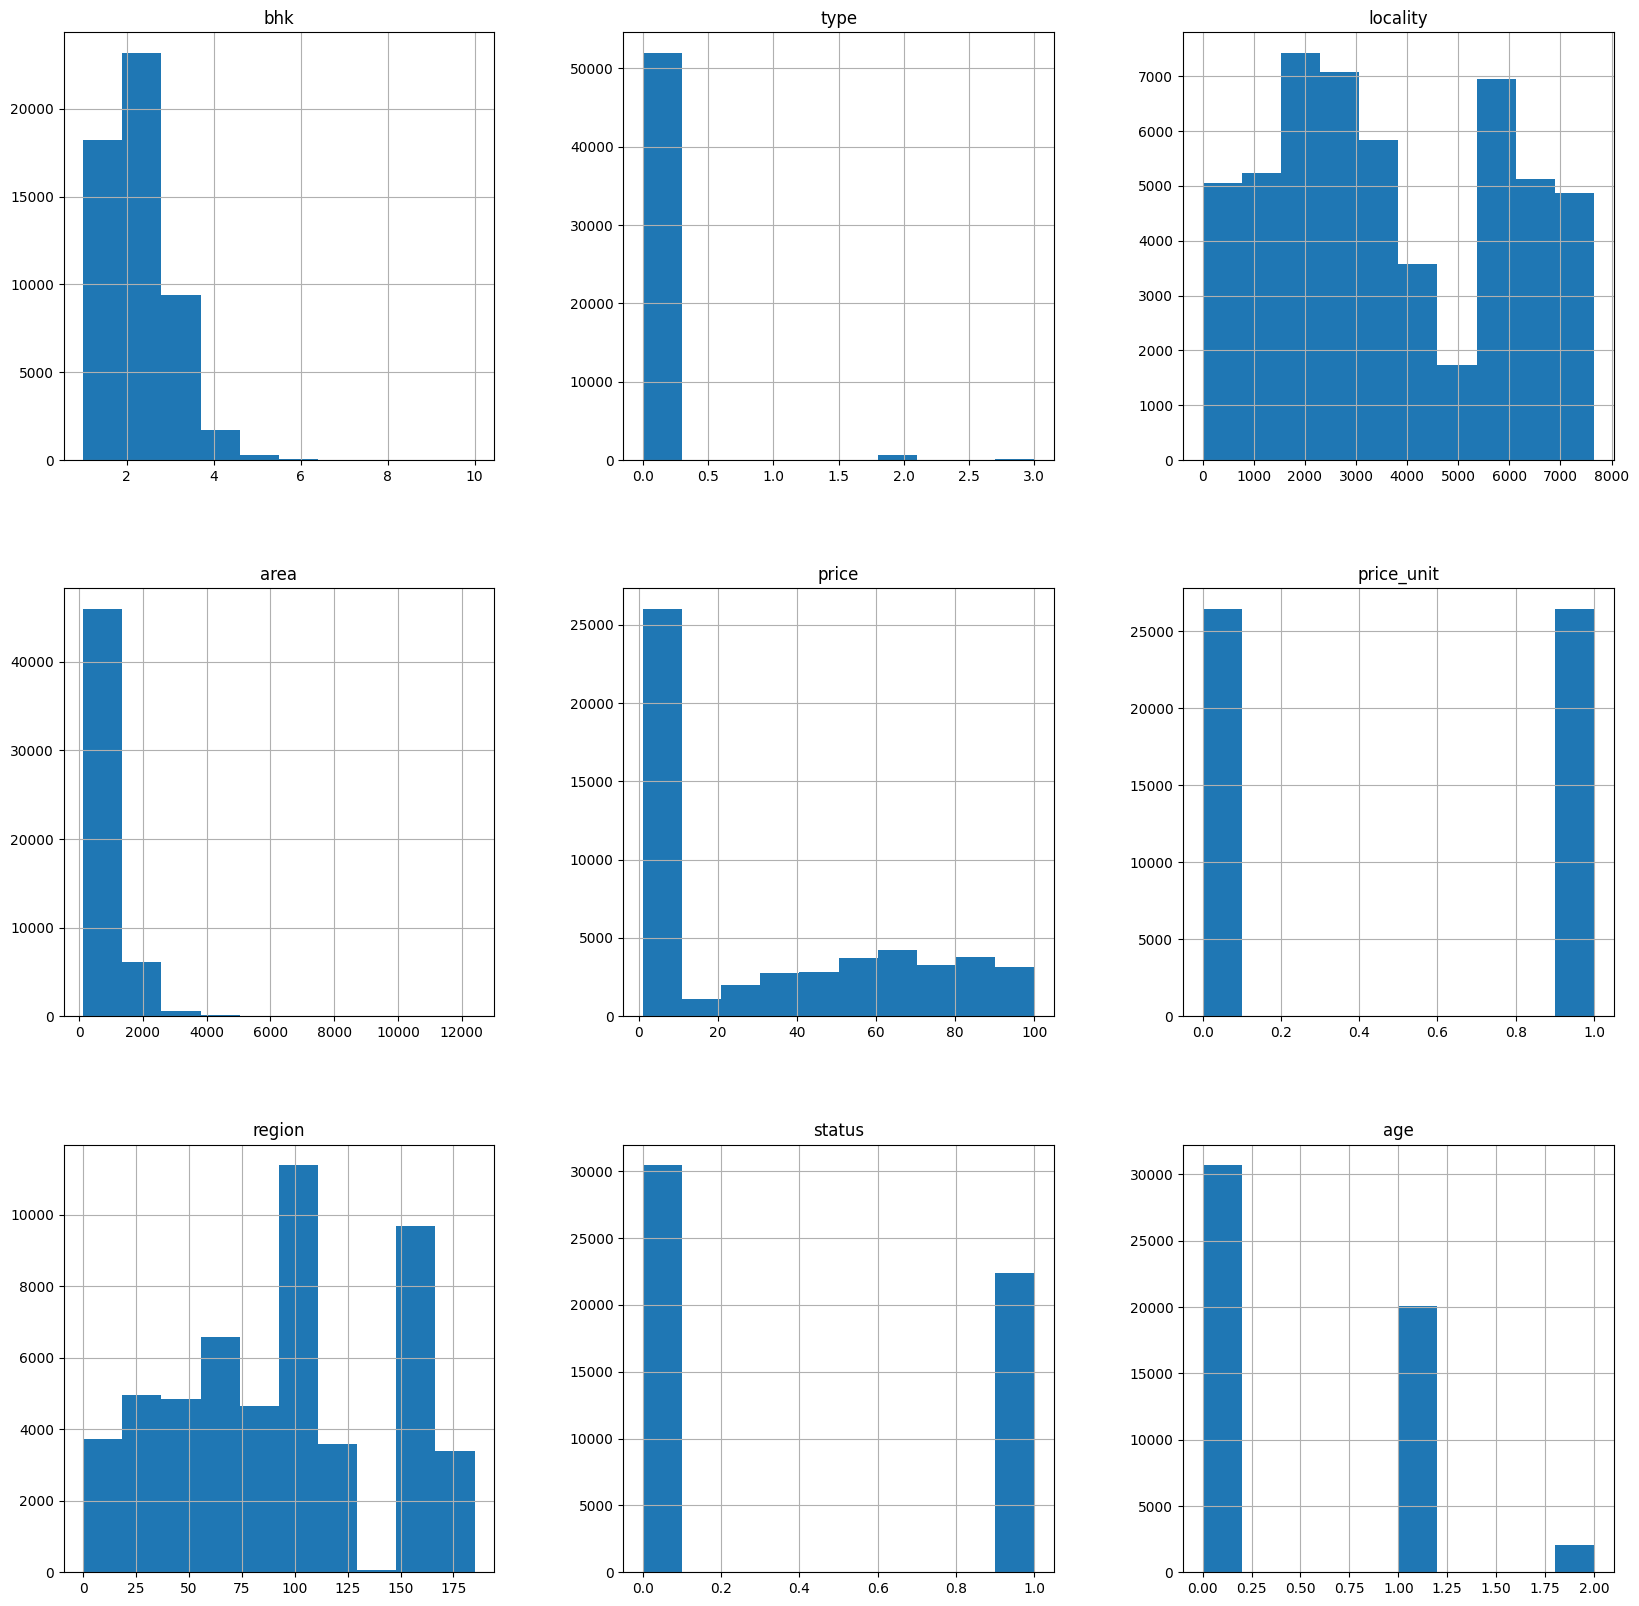

In [71]:
df.hist(figsize = (20,20))

In [72]:
df.corr()

,bhk,type,locality,area,price,price_unit,region,status,age
bhk,1.000000,-0.056471,-0.054690,0.759503,-0.403190,-0.580589,0.031064,-0.039526,0.077295
type,-0.056471,1.000000,0.028910,0.020856,-0.008496,0.083179,0.004046,-0.036865,0.005101
locality,-0.054690,0.028910,1.000000,-0.048483,0.043031,0.068204,-0.100559,-0.003718,0.011636
area,0.759503,0.020856,-0.048483,1.000000,-0.283415,-0.425517,0.021390,-0.170633,0.138927
price,-0.403190,-0.008496,0.043031,-0.283415,1.000000,0.882235,0.055869,0.000916,-0.077513
price_unit,-0.580589,0.083179,0.068204,-0.425517,0.882235,1.000000,0.042738,-0.013427,-0.080325
region,0.031064,0.004046,-0.100559,0.021390,0.055869,0.042738,1.000000,-0.031877,0.063556
status,-0.039526,-0.036865,-0.003718,-0.170633,0.000916,-0.013427,-0.031877,1.000000,-0.472163
age,0.077295,0.005101,0.011636,0.138927,-0.077513,-0.080325,0.063556,-0.472163,1.000000


<Axes: >

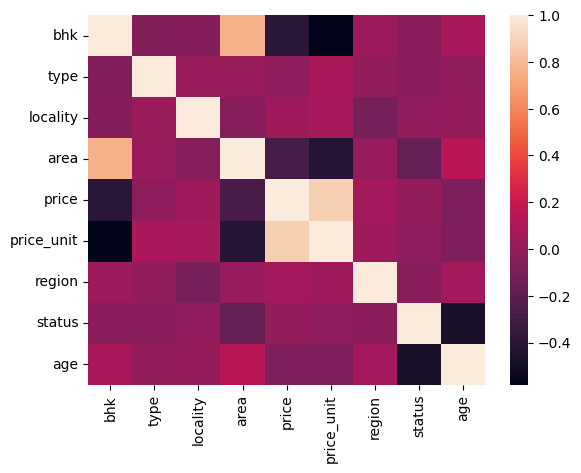

In [74]:
sns.heatmap(df.corr())

In [9]:
# Describe the dataset
df.describe()

,bhk,area,price
count,52886.000000,52885.000000,52885.000000
mean,1.921889,948.047348,32.469523
std,0.855664,543.660972,33.938115
min,1.000000,127.000000,1.000000
25%,1.000000,635.000000,1.780000
50%,2.000000,829.000000,16.000000
75%,2.000000,1100.000000,63.000000
max,10.000000,12400.000000,99.990000


In [10]:

# Check for null values
df.isnull().sum()


bhk           0
type          0
locality      0
area          1
price         1
price_unit    1
region        1
status        1
age           1
dtype: int64

In [50]:
df.dropna(inplace=True) ## drop null values


In [51]:
df.isnull().sum()

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64

 Initialize the **LabelEncoder**

In [53]:
# Initialize the LabelEncoder
le = LabelEncoder()


In [54]:
type = LabelEncoder() ### every column ko distribute in numers
locality  = LabelEncoder()
region   = LabelEncoder()
status = LabelEncoder()
age = LabelEncoder()


In [55]:
# Fit the LabelEncoder and transform the data for each column
df['type'] = le.fit_transform(df['type'])
df['locality'] = le.fit_transform(df['locality'])
df['status'] = le.fit_transform(df['status'])
df['age'] = le.fit_transform(df['age'])
df['region'] = le.fit_transform(df['region'])
df['price_unit'] = le.fit_transform(df['price_unit'])

print("\nEncoded Data:")
print(df)



Encoded Data:
       bhk  type  locality    area  price  price_unit  region  status  age
0        3     0      2314   685.0   2.50           0       7       0    0
1        2     0      3832   640.0  52.51           1      99       1    0
2        2     0      5534   610.0   1.73           0      26       1    0
3        2     0      6653   876.0  59.98           1     113       1    0
4        2     0      3287   659.0  94.11           1      94       1    0
...    ...   ...       ...     ...    ...         ...     ...     ...  ...
52880    3     0      1699  2036.0   4.50           0     159       0    2
52881    1     0      6635   550.0  24.00           1     168       1    0
52882    1     0      2978   570.0  24.00           1      99       0    0
52883    2     0      3058   990.0  57.50           1      99       1    0
52884    1     0      7643   535.0  25.00           1     168       1    0

[52885 rows x 9 columns]


In [56]:
df

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,0,2314,685.0,2.50,0,7,0,0
1,2,0,3832,640.0,52.51,1,99,1,0
2,2,0,5534,610.0,1.73,0,26,1,0
3,2,0,6653,876.0,59.98,1,113,1,0
4,2,0,3287,659.0,94.11,1,94,1,0
...,...,...,...,...,...,...,...,...,...
52880,3,0,1699,2036.0,4.50,0,159,0,2
52881,1,0,6635,550.0,24.00,1,168,1,0
52882,1,0,2978,570.0,24.00,1,99,0,0
52883,2,0,3058,990.0,57.50,1,99,1,0


Step 4: Data **Preprocessing**

In [57]:
# Define feature variables (X) and the target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
X

,bhk,type,locality,area,price_unit,region,status,age
0,3,0,2314,685.0,0,7,0,0
1,2,0,3832,640.0,1,99,1,0
2,2,0,5534,610.0,0,26,1,0
3,2,0,6653,876.0,1,113,1,0
4,2,0,3287,659.0,1,94,1,0
...,...,...,...,...,...,...,...,...
52880,3,0,1699,2036.0,0,159,0,2
52881,1,0,6635,550.0,1,168,1,0
52882,1,0,2978,570.0,1,99,0,0
52883,2,0,3058,990.0,1,99,1,0


In [59]:
y

0         2.50
1        52.51
2         1.73
3        59.98
4        94.11
         ...  
52880     4.50
52881    24.00
52882    24.00
52883    57.50
52884    25.00
Name: price, Length: 52885, dtype: float64

Train the Linear Regression **Model**

In [60]:
X_train

,bhk,type,locality,area,price_unit,region,status,age
41931,1,0,1866,308.0,1,159,1,0
18303,3,0,5591,1445.0,0,67,1,0
20385,1,0,7309,730.0,1,94,1,0
34590,2,0,4678,1090.0,0,96,0,1
7385,2,0,7262,1175.0,1,163,1,0
...,...,...,...,...,...,...,...,...
11284,2,0,1822,780.0,1,94,1,0
44732,2,0,2500,810.0,0,159,0,1
38158,1,0,791,430.0,0,49,1,0
860,1,0,5441,651.0,1,7,0,1


In [61]:
X_test

,bhk,type,locality,area,price_unit,region,status,age
7613,1,0,7612,575.0,1,23,0,0
8850,2,0,7537,850.0,1,113,0,1
46816,2,0,7422,1187.0,0,159,0,2
46756,1,0,3477,480.0,0,96,1,2
22125,1,0,452,780.0,1,13,0,0
...,...,...,...,...,...,...,...,...
42167,1,0,2045,448.0,0,65,1,0
48097,1,0,2319,715.0,1,163,0,1
26051,2,0,695,650.0,1,179,0,1
16429,3,0,1614,1700.0,0,159,0,1


In [62]:
y_test

7613     21.85
8850     78.00
46816     1.45
46756     1.10
22125    29.70
         ...  
42167     1.01
48097    58.00
26051    40.99
16429     5.50
44421    92.00
Name: price, Length: 10577, dtype: float64

In [63]:
y_train

41931    46.99
18303     2.02
20385    54.50
34590     2.10
7385     99.00
         ...  
11284    95.00
44732     1.10
38158     1.05
860      20.00
15795     1.45
Name: price, Length: 42308, dtype: float64

In [64]:
# Instantiate the Linear Regression model
lr = LinearRegression()

In [65]:
# Fit the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

Step 6: Make **Predictions**

In [66]:
# Predict the target values for the test set
y_pred = lr.predict(X_test)


Step 7: Evaluate the **Model**

In [67]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2}")


Mean Squared Error: 226.74519037350495
R-squared value: 0.8046117116568794


In [75]:
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 15.058060644502165


In [76]:
# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2}")

R-squared value: 0.8046117116568794


Step 8: Visualize the **Results**

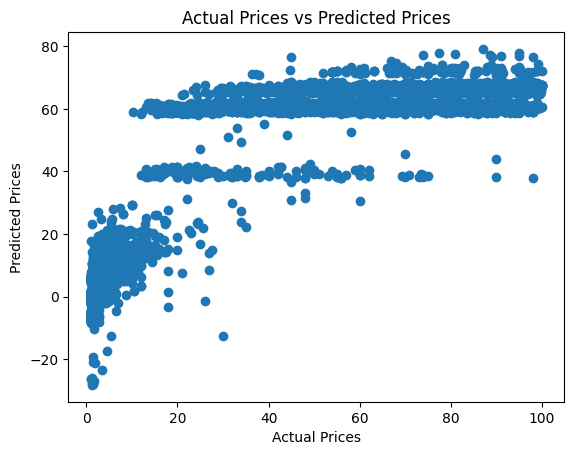

In [68]:
# Plot the true values vs the predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()
